# Predicting a Continuous Target with Regression of Medical Cost Personal Dataset

Author: Data-Git-Hub <br>
GitHub Project Repository Link: https://github.com/Data-Git-Hub/applied-ml-data-git-hub <br>
4 April 2025 <br>

### Introduction
This project aims to develop a regression model that predicts medical insurance charges based on the demographic and health-related attributes provided in the dataset. The goal is to investigate how features such as age, BMI, and smoking status impact medical costs and to compare the performance of various regression techniques, including linear regression, ridge regression, elastic net, and polynomial regression.  <br>

### Imports
Python libraries are collections of pre-written code that provide specific functionalities, making programming more efficient and reducing the need to write code from scratch. These libraries cover a wide range of applications, including data analysis, machine learning, web development, and automation. Some libraries, such as os, sys, math, json, and datetime, come built-in with Python as part of its standard library, providing essential functions for file handling, system operations, mathematical computations, and data serialization. Other popular third-party libraries, like pandas, numpy, matplotlib, seaborn, and scikit-learn, must be installed separately and are widely used in data science and machine learning. The extensive availability of libraries in Python's ecosystem makes it a versatile and powerful programming language for various domains. <br>

Pandas is a powerful data manipulation and analysis library that provides flexible data structures, such as DataFrames and Series. It is widely used for handling structured datasets, enabling easy data cleaning, transformation, and aggregation. Pandas is essential for data preprocessing in machine learning and statistical analysis. <br>
https://pandas.pydata.org/docs/ <br>

NumPy (Numerical Python) is a foundational library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a comprehensive collection of mathematical functions to operate on these arrays efficiently. NumPy is a key component in scientific computing and machine learning. <br>
https://numpy.org/doc/stable/ <br>

Matplotlib is a widely used data visualization library that allows users to create static, animated, and interactive plots. It provides extensive tools for generating various chart types, including line plots, scatter plots, histograms, and bar charts, making it a critical library for exploratory data analysis. <br>
https://matplotlib.org/stable/contents.html <br>

Seaborn is a statistical data visualization library built on top of Matplotlib, designed for creating visually appealing and informative plots. It simplifies complex visualizations, such as heatmaps, violin plots, and pair plots, making it easier to identify patterns and relationships in datasets. <br>
https://seaborn.pydata.org/ <br>

Scikit-learn provides a variety of tools for machine learning, including data preprocessing, model selection, and evaluation. It contains essential functions for building predictive models and analyzing datasets. <br>
sklearn.metrics: This module provides various performance metrics for evaluating machine learning models. <br>
https://scikit-learn.org/stable/modules/model_evaluation.html<br>

IPython.core.display is a module from the IPython library that provides tools for displaying rich output in Jupyter Notebooks, including formatted text, images, HTML, and interactive widgets. It enhances visualization and interaction within Jupyter environments.
https://ipython.readthedocs.io/en/stable/api/generated/IPython.core.display.html <br>

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Machine learning imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LogisticRegression, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Fully disable output truncation in Jupyter (for VS Code)
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display

# Load the Medical Cost dataset
# Load the dataset from the specified path
data_path = r"C:\Projects\applied-ml-data-git-hub\lab04\data\insurance.csv"
df = pd.read_csv(data_path)
# Preview the first few rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Section 1. Import and Inspect Data

We will import the first few rows of the dataset and display important information to make decisions later through the process.

#### Section 1.A. Dataset Structure and Data Types <br>

In [2]:
df = pd.read_csv("data/insurance.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Section 1.B. Summary Statistics and Check for Missing Values <br>

In [4]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Summary Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Section 2. Data Exploration and Preparation

Since from the inspection of the data there doesn't seem to be any missing values we can examine if there are any feature engineering that we might want to do with the datasets. A few features that we can consider and see if these ideas add fidelity to the overall fit of the datasets to the machine learning models.  

#### 2.1. Encode the Sex Column

The `sex` column is a categorical variable, and in order to use it in regression models, I needed to convert it into a numeric format. I created a new column called `sex_encoded` where I encoded male as 0 and female as 1. <br>

In [6]:
df['sex_encoded'] = df['sex'].map({'male': 0, 'female': 1})

#### 2.2. Encode the Smoker Column

The `smoker` column likely has a strong effect on insurance charges. Since it's a categorical variable, I encoded it as 1 for smokers and 0 for non-smokers, storing the result in a new column called `smoker_encoded`. <br>

In [7]:
df['smoker_encoded'] = df['smoker'].map({'yes': 1, 'no': 0})

#### 2.3. Encode the Region Column

The `region` column is a nominal categorical variable without an inherent order. I used one-hot encoding to convert it into multiple binary columns so the regression models can interpret it properly. <br>

In [8]:
df = pd.get_dummies(df, columns=['region'], prefix='region', drop_first=True)

#### 2.4. Encode High Risk Based on BMI

To simplify the BMI information into a format suitable for regression, I created a binary variable called `bmi_risk`. Individuals with a BMI of 25 or higher were classified as high risk (1), and those with a BMI below 25 were classified as normal risk (0). This transformation allows the model to potentially capture health risk patterns related to body weight. <br>

In [9]:
df['bmi_risk'] = df['bmi'].apply(lambda x: 1 if x >= 25 else 0)

#### 2.5. Calculate BMI Category (Optional Feature Engineering)

To explore whether non-linear patterns in BMI could improve predictions, I created a categorical variable called `bmi_category`, which classifies individuals as underweight, normal, overweight, or obese based on standard BMI thresholds. This feature could help in some models or when used in visualization. <br>

In [10]:
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 25:
        return 'normal'
    elif 25 <= bmi < 30:
        return 'overweight'
    else:
        return 'obese'

df['bmi_category'] = df['bmi'].apply(classify_bmi)

### Section 3: Feature Selection and Justification

In this section, different combinations of input features to predict medical insurance charges. The goal is to evaluate how individual variables or combinations of variables contribute to the accuracy of a regression model. Each case below represents a unique selection of predictors, which will be used to train and compare models later. <br>

#### 3.1. Case 1 – Age Only
Looking at `age` only, we will examine whether a person’s age alone can predict insurance charges. This will help establish a simple baseline model using just one numerical feature. <br>

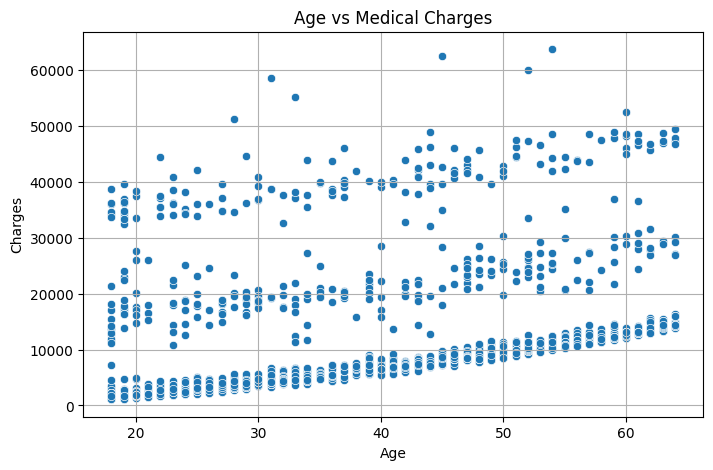

In [11]:
# Feature selection
X1 = df[['age']]
y1 = df['charges']

# Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Age vs Medical Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()


#### 3.2. Case 2 – BMI Risk Only

For the second case, using the `bmi_risk` variable we created earlier. This binary indicator reflects whether someone is in a high-risk BMI category, which may impact their healthcare costs. <br>

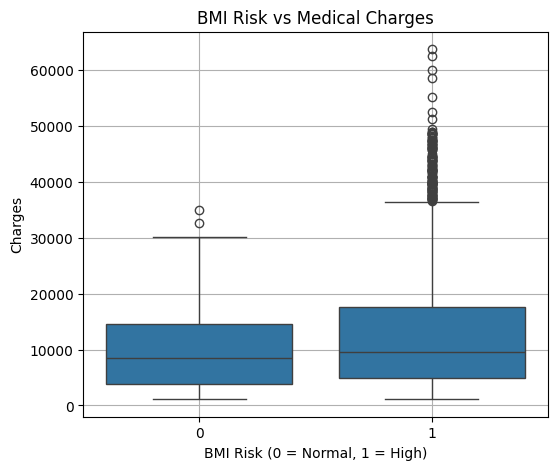

In [12]:
# Feature selection
X2 = df[['bmi_risk']]
y2 = df['charges']

# Visualization
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='bmi_risk', y='charges')
plt.title('BMI Risk vs Medical Charges')
plt.xlabel('BMI Risk (0 = Normal, 1 = High)')
plt.ylabel('Charges')
plt.grid(True)
plt.show()


#### 3.3. Case 3 – Age and Smoker Status

In the third case, Combining `age` with `smoker_encoded` to explore the combined impact of age and smoking on charges. Smoking is likely a strong predictor, so I expect this model to outperform those based on age or BMI alone. <br>

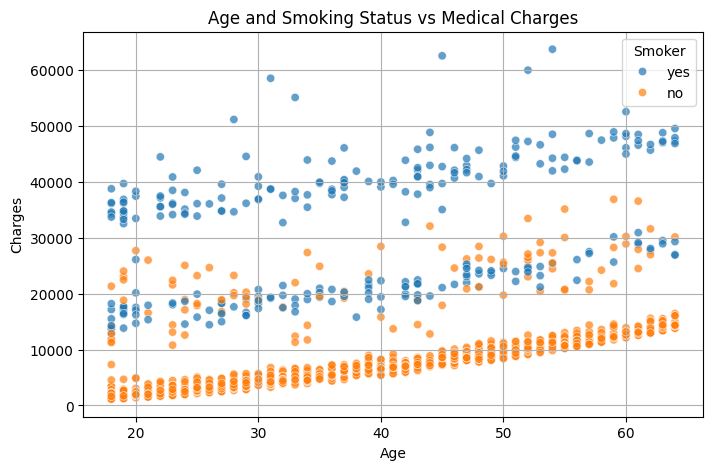

In [13]:
# Feature selection
X3 = df[['age', 'smoker_encoded']]
y3 = df['charges']

# Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', alpha=0.7)
plt.title('Age and Smoking Status vs Medical Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.grid(True)
plt.show()


#### 3.4. Case 4 – Age, BMI, Sex, and Smoker

In the final case, using a more complete set of predictors: `age`, `bmi`, `sex_encoded`, and `smoker_encoded`. This combination includes both demographic and health-related features, which should provide the most predictive power. <br>

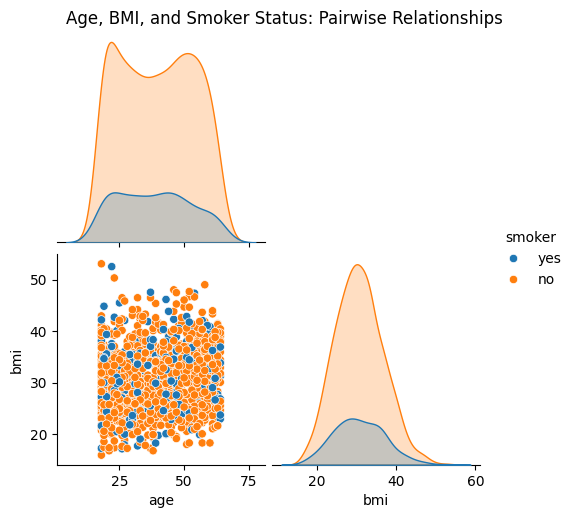

In [14]:
# Feature selection
X4 = df[['age', 'bmi', 'sex_encoded', 'smoker_encoded']]
y4 = df['charges']

# Visualization: Pairplot
sns.pairplot(df, vars=['age', 'bmi'], hue='smoker', diag_kind='kde', corner=True)
plt.suptitle('Age, BMI, and Smoker Status: Pairwise Relationships', y=1.02)
plt.show()


### Reflection Section 3:

#### 1. Why might these features in Cases 1 through 3 affect medical charges? <br>

In Case 1, I selected `age` as the only input feature. Age can influence medical charges because as individuals get older, they often require more frequent or more intensive healthcare services, which may lead to higher insurance costs. The scatter plot between `age` and `charges` showed a slightly increasing trend, although the variation suggests that age alone doesn’t fully explain the cost differences. <br>

In Case 2, I used the binary `bmi_risk` variable. Individuals with a BMI of 25 or higher are generally considered overweight or obese, which increases the likelihood of chronic health conditions such as diabetes or heart disease. The boxplot revealed that people in the high-risk BMI group tend to have higher charges on average, supporting the assumption that elevated BMI may be linked to greater healthcare costs. <br>

In Case 3, I combined `age` and `smoker_encoded`. I expect this combination to have a stronger predictive value because smoking is a well-known risk factor for many medical conditions. The scatter plot colored by smoker status clearly showed that smokers tend to have significantly higher charges, even at younger ages. This case introduces a strong categorical influence (smoker) alongside a continuous one (age), giving the model more context. <br>

#### 2. List all available features: <br>

The original dataset includes the following features: <br>

`age`: The age of the individual <br>

`sex`: The individual's gender (categorical) <br>

`bmi`: Body Mass Index – a numeric value reflecting body fat <br>

`children`: Number of dependents covered by the insurance <br>

`smoker`: Whether the person smokes (categorical) <br>

`region`: The geographical region of residence (categorical) <br>

`charges`: The target variable — medical insurance charges (numeric) <br>

In addition, I engineered several new features during data preparation: <br>

`sex_encoded`: Encoded numeric value for sex (male = 0, female = 1) <br>

`smoker_encoded`: Encoded numeric value for smoker (no = 0, yes = 1) <br>

`bmi_risk`: Binary risk indicator for BMI (≥25 = 1, otherwise 0) <br> 

#### 3. Which other features could improve predictions and why? <br>

Other features that could improve predictions include children, which may influence insurance costs depending on whether the policy covers dependents. Additionally, the region variable might indirectly capture regional differences in healthcare costs or accessibility, which could contribute to variance in charges. These categorical region variables have been one-hot encoded and could be tested in more advanced models to determine if they provide value. <br>

Furthermore, interaction terms—like bmi × smoker—could reveal more complex relationships (e.g., whether high BMI is particularly costly for smokers). Also, using bmi_category as a categorical variable instead of raw BMI might reveal thresholds more effectively than treating BMI as a continuous variable. <br>

#### 4. How many variables are in your Case 4? <br>

My Case 4 model includes four input variables: <br>

`age` <br>

`bmi` <br>

`sex_encoded` <br>

`smoker_encoded` <br>

These were selected to combine both demographic and lifestyle indicators in a way that balances model complexity with potential predictive power. <br>

#### 5. Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs? <br>
 
For Case 4, I chose `age`, `bmi`, `sex_encoded`, and `smoker_encoded`. I believe these features are strong candidates because they represent a mix of personal, physiological, and behavioral factors. Age and BMI are both continuous variables known to impact health and medical costs. `Smoker_encoded` captures a key risk factor directly linked to higher healthcare usage. `Sex_encoded` might help account for systemic cost differences between males and females, which often exist due to variations in health needs and insurance pricing. Together, these features offer both individual and combined influence on the target variable and are expected to enhance model performance based on the data exploration and visual analysis I conducted. <br>

### Section 4. Train a Regression Model (Linear Regression)

#### 4.1. Split the Data